In [2]:
# Importing libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [3]:
# Reading datasets 
train_data = pd.read_excel("./datasets/Data_Train.xlsx")

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
# checking missing value
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
# Few missing values so, gone drop it
train_data.dropna(inplace=True)

In [7]:
# shape of datasets 
train_data.shape

(10682, 11)

In [8]:
# Rechecking missing value
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
# Checking datasets types and ML model only takes numerical values not charcter/string 
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [10]:
# Listing train_data columns 
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [11]:
# Changing object into datetime in (object dtypes but only where date time is necessary)
def change_into_datetime(col):
    train_data[col] = pd.to_datetime(train_data[col])

for col in['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(col)

In [12]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [13]:
# Converting yy--mm--dd to single d,M, Year we don't need
train_data['Journey_Day'] = train_data['Date_of_Journey'].dt.day
train_data['Journey_Month'] = train_data['Date_of_Journey'].dt.month

In [14]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-08-08 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-08-08 05:50:00,2024-08-08 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2024-08-08 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2024-08-08 18:05:00,2024-08-08 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2024-08-08 16:50:00,2024-08-08 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [15]:
# Now we can drop Date_of_Joutrney
train_data.drop('Date_of_Journey', axis=1, inplace=True)

In [16]:
# Coverting date into only hour and minute and dropping it Function
def extract_hour(df,col):
    df[col+"_hour"] = df[col].dt.hour

def extract_min(df,col):
    df[col+"_minute"] = df[col].dt.minute

def drop_column(df,col):
    df.drop(col,axis=1, inplace=True)

In [17]:
# Coverting Dep_Time into only hour and minute and dropping it 
extract_hour(train_data, "Dep_Time")
extract_min(train_data, "Dep_Time")
drop_column(train_data, "Dep_Time")

In [18]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-08-08 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2024-08-08 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2024-08-08 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50


In [19]:
# Coverting Arrival_Time into only hour and minute and dropping it 
extract_hour(train_data, "Arrival_Time")
extract_min(train_data, "Arrival_Time")
drop_column(train_data, "Arrival_Time")

In [20]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [21]:
train_data['Duration'][0].split(' ')

['2h', '50m']

In [22]:
# Pre processing Duration adding '0m' if there is no minute and adding '0h' if there is no hour
duration = list(train_data['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' ')) == 2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] ='0h ' + duration[i] 
train_data['Duration'] = duration

In [23]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [24]:
train_data['Duration'][0].split(' ')[0][0:-1]

'2'

In [25]:
# Accessing only hour and min value without h and m from duration
def hour(x):
    return x.split(' ')[0][0:-1]

def minute(x):
    return x.split(' ')[1][0:-1]

train_data['Duration_hours'] = train_data['Duration'].apply(hour)
train_data['Duration_minute'] = train_data['Duration'].apply(minute)

drop_column(train_data, 'Duration')

In [26]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_Day             int64
Journey_Month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours         object
Duration_minute        object
dtype: object

In [27]:
# Extracting numerical and categorical column data types 
cat_col = [col for col in train_data.columns if train_data[col].dtype == "O"]
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Total_Stops',
 'Additional_Info',
 'Duration_hours',
 'Duration_minute']

In [28]:
num_col = [col for col in train_data.columns if train_data[col].dtype != "O"]
num_col

['Price',
 'Journey_Day',
 'Journey_Month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute']

In [29]:
# Label Encoding 
categorical = train_data[cat_col]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration_hours,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,4,45


In [30]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [31]:
Airline = pd.get_dummies(categorical['Airline'], drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


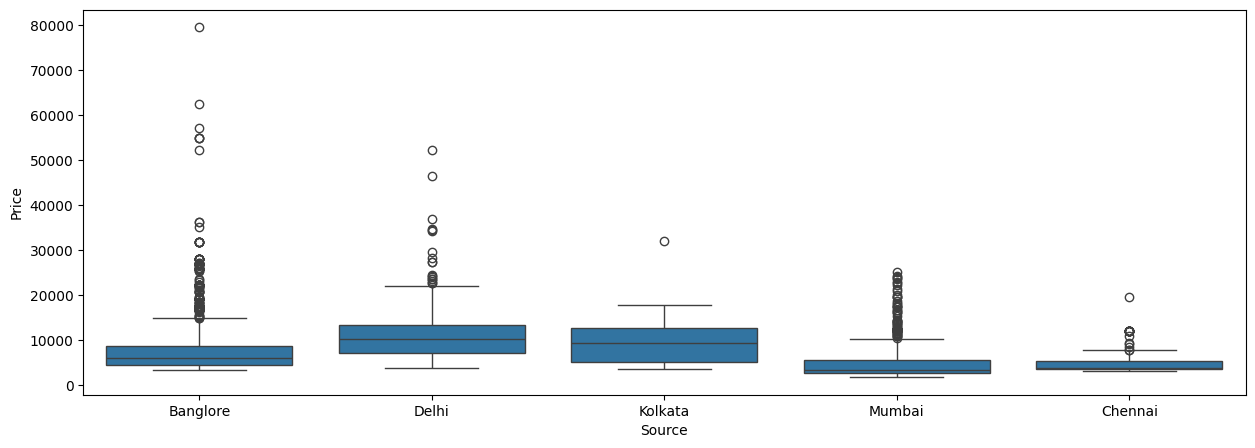

In [32]:
# Box plot of categorial Source and Price 
plt.figure(figsize=(15,5))
sns.boxplot(x='Source', y='Price', data=train_data.sort_values('Price', ascending=False))
source = pd.get_dummies(categorical['Source'], drop_first=True)
source.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


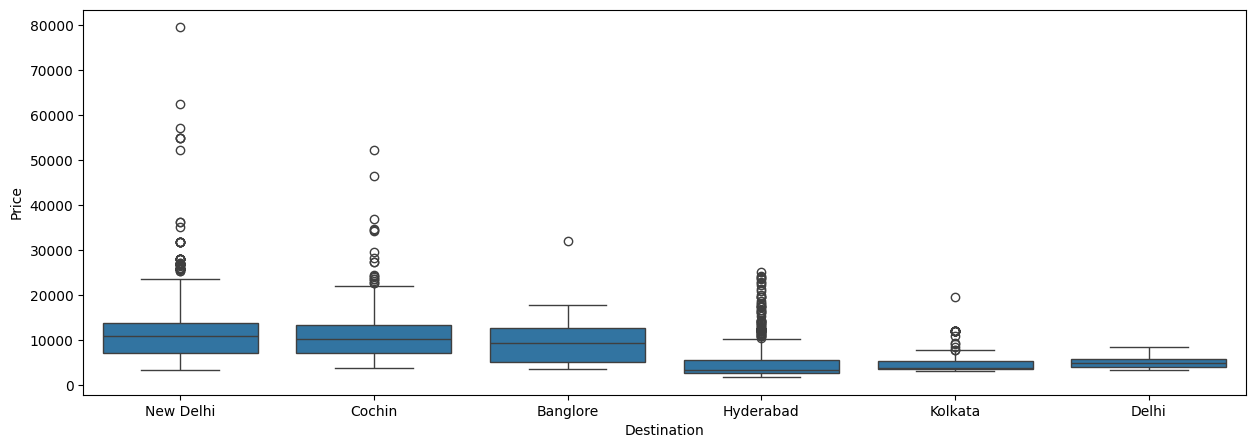

In [33]:
# Box plot of categorial desitination and Price 
plt.figure(figsize=(15,5))
sns.boxplot(x='Destination',y='Price', data=train_data.sort_values('Price',ascending=False))
Destination = pd.get_dummies(categorical['Destination'], drop_first=True)
Destination.head()

In [34]:
train_data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [35]:
categorical['Route_1'] = categorical['Route'].str.split('→').str[0]
categorical['Route_2'] = categorical['Route'].str.split('→').str[1]
categorical['Route_3'] = categorical['Route'].str.split('→').str[2]
categorical['Route_4'] = categorical['Route'].str.split('→').str[3]
categorical['Route_5'] = categorical['Route'].str.split('→').str[4]

drop_column(categorical,'Route')

/var/folders/2g/9_hmst594_72vjd1f22xng4w0000gn/T/ipykernel_18685/642281891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_1'] = categorical['Route'].str.split('→').str[0]
/var/folders/2g/9_hmst594_72vjd1f22xng4w0000gn/T/ipykernel_18685/642281891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_2'] = categorical['Route'].str.split('→').str[1]
/var/folders/2g/9_hmst594_72vjd1f22xng4w0000gn/T/ipykernel_18685/642281891.py:3: SettingWithCopyWarning: 
A value is tryin

In [36]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Duration_hours         0
Duration_minute        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [37]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Duration_hours', 'Duration_minute', 'Route_1', 'Route_2', 'Route_3',
       'Route_4', 'Route_5'],
      dtype='object')

In [38]:
for i in ['Route_3', 'Route_4', 'Route_5']:
    categorical[i].fillna('None', inplace=True)

for i in categorical.columns:
    print('{} has total {} categories'.format(i, len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Duration_hours has total 44 categories
Duration_minute has total 12 categories
Route_1 has total 5 categories
Route_2 has total 45 categories
Route_3 has total 30 categories
Route_4 has total 14 categories
Route_5 has total 6 categories


/opt/anaconda3/lib/python3.11/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [39]:
#  Label enconding usin scikit-learn
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categorical.columns
for i in['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
    categorical[i] = encoder.fit_transform(categorical[i])

categorical.head()

/var/folders/2g/9_hmst594_72vjd1f22xng4w0000gn/T/ipykernel_18685/4193978470.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i] = encoder.fit_transform(categorical[i])
/var/folders/2g/9_hmst594_72vjd1f22xng4w0000gn/T/ipykernel_18685/4193978470.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i] = encoder.fit_transform(categorical[i])
/var/folders/2g/9_hmst594_72vjd1f22xng4w0000gn/T/ipykernel_18685/4193978470.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy o

,Airline,Source,Destination,Total_Stops,Additional_Info,Duration_hours,Duration_minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,2,50,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,7,25,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,19,0,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,5,25,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,4,45,0,34,8,13,5


In [40]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [41]:
# Custome apporch of label encoder beacuse of less data to encode 
dict = {'non-stop':0, 
        '2 stops':2, 
        '1 stop':1, 
        '3 stops':3, 
        '4 stops':4
}
categorical['Total_Stops'] = categorical['Total_Stops'].map(dict)

/var/folders/2g/9_hmst594_72vjd1f22xng4w0000gn/T/ipykernel_18685/969417589.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Total_Stops'] = categorical['Total_Stops'].map(dict)


In [42]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Duration_hours,Duration_minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,No info,2,50,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,No info,7,25,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,No info,19,0,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,No info,5,25,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,No info,4,45,0,34,8,13,5


In [43]:
# concat categorical and numerical dataframe 
data_train = pd.concat([categorical,Airline,source,Destination,train_data[num_col]], axis=1)

In [44]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Duration_hours,Duration_minute,Route_1,Route_2,Route_3,...,Hyderabad,Kolkata,New Delhi,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,0,No info,2,50,0,13,29,...,0,0,1,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,2,No info,7,25,2,25,1,...,0,0,0,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,2,No info,19,0,3,32,4,...,0,0,0,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,1,No info,5,25,2,34,3,...,0,0,0,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,1,No info,4,45,0,34,8,...,0,0,1,13302,3,1,16,50,21,35


In [45]:
# Dropping Airline, Source, Destination
drop_column(data_train, 'Airline')
drop_column(data_train, 'Source')
drop_column(data_train, 'Destination')
drop_column(data_train, 'Additional_Info')

In [46]:
pd.set_option('display.max_columns', 35)
data_train.head()

,Total_Stops,Duration_hours,Duration_minute,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,0,2,50,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10
1,2,7,25,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15
2,2,19,0,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25
3,1,5,25,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30
4,1,4,45,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35


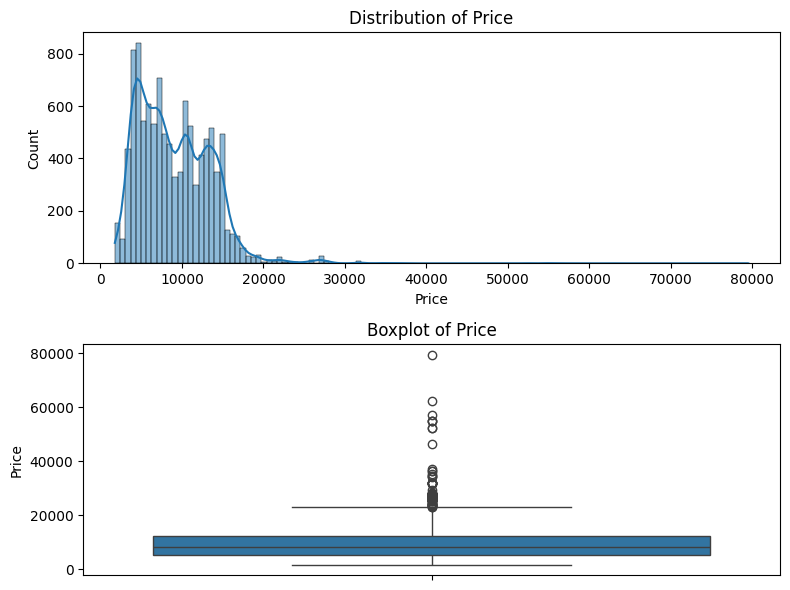

In [47]:
# Handling outliers 
def plot(df, col):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
    sns.histplot(df[col], ax=ax1, kde=True)
    sns.boxplot(df[col], ax=ax2)
    ax1.set_title(f'Distribution of {col}')
    ax2.set_title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

# Assuming data_train is already defined
plot(data_train, 'Price')

In [48]:
# Replacing outliers with median value
data_train['Price'] = np.where(data_train['Price']>= 40000, data_train['Price'].median(), data_train['Price'])

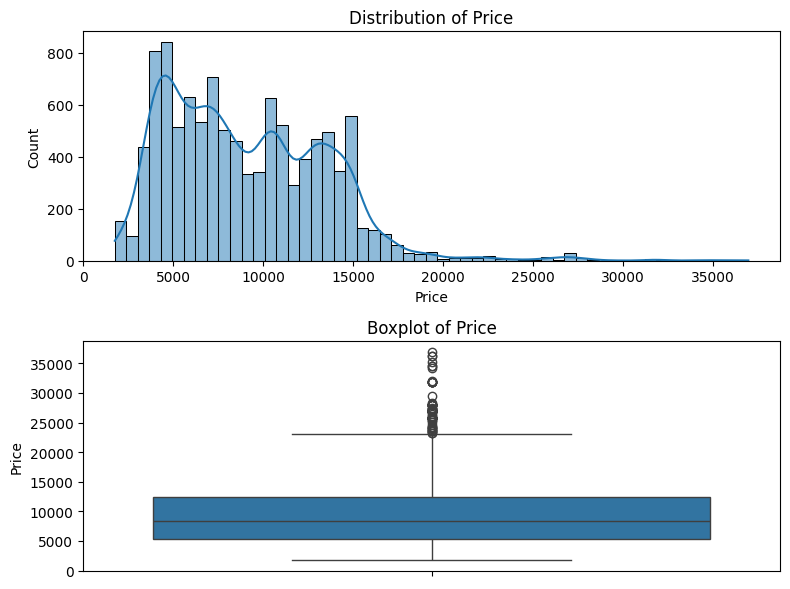

In [49]:
plot(data_train, 'Price')

In [50]:
data_train.columns

Index(['Total_Stops', 'Duration_hours', 'Duration_minute', 'Route_1',
       'Route_2', 'Route_3', 'Route_4', 'Route_5', 'Air India', 'GoAir',
       'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi', 'Price',
       'Journey_Day', 'Journey_Month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute'],
      dtype='object')

In [51]:
# Features and Target selection 
# Features
X = data_train.drop(columns=['Price'])
X.head()

,Total_Stops,Duration_hours,Duration_minute,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,0,2,50,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10
1,2,7,25,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,50,13,15
2,2,19,0,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,9,25,4,25
3,1,5,25,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,18,5,23,30
4,1,4,45,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35


In [52]:
# Target
y= data_train['Price']
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

In [53]:
# Less features importance or selecting best features 
from sklearn.feature_selection import mutual_info_classif
mutual_info_classif(X,y)

array([1.98456579, 1.78211672, 1.1382706 , 2.30021063, 2.96343372,
       2.53790672, 1.6892106 , 1.42431595, 0.67266747, 0.10224008,
       0.63082675, 0.88460889, 0.0060683 , 0.52754557, 0.0273058 ,
       0.3007638 , 0.01063583, 0.22183199, 0.        , 0.17003623,
       1.3535226 , 0.81811281, 0.27277234, 1.36763818, 0.38256107,
       0.27524015, 0.15388425, 0.3383567 , 1.24658272, 1.08713349,
       1.50903658, 1.29375279, 1.90165296, 1.58985659])

In [54]:
important = pd.DataFrame(mutual_info_classif(X,y), index=X.columns)
important
important.columns = ['importance']
important.sort_values(by = 'importance', ascending=False)

,importance
Route_2,3.010540
Route_3,2.541949
Route_1,2.324088
Total_Stops,1.931626
Arrival_Time_hour,1.892745
Duration_hours,1.760765
Route_4,1.679797
Arrival_Time_minute,1.601285
Dep_Time_hour,1.534394
Route_5,1.500185


In [55]:
# You can remove Truject because of less importance 

### ML Algorithm Selection
#### 1. Random Forest

In [57]:
# Splitting datasets into training and testing 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [58]:
# shape of splitted datasets (80% training and 20% testing)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8545, 34), (2137, 34), (8545,), (2137,))

In [59]:
from sklearn import metrics
import pickle
def predict(ml_model, dump):
    model = ml_model.fit(X_train, y_train)
    print("Training Score: {}".format(model.score(X_train, y_train)))

    predictions = model.predict(X_test)
    print("Predections are: {}".format(predictions))
    print('\n')

    r2_score = metrics.r2_score(y_test, predictions)
    print("r2 score is {}".format(r2_score))

    print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, predictions))
    print("Mean Squared Error: ", metrics.mean_squared_error(y_test, predictions))
    print("Root Mean Absolute Error: ", np.sqrt(metrics.mean_absolute_error(y_test, predictions)))

    plt.figure(figsize=(10, 6))
    sns.histplot(y_test, color="blue", kde=True, label='Actual Value', stat='density', common_norm=False)
    sns.histplot(predictions, color="red", kde=True, label='Predicted Value', stat='density', common_norm=False)
    plt.title('Distribution of Actual vs Predicted Values')
    plt.xlabel('Price')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    if dump == 1:
        file = open('./model.pkl', 'wb')
        pickle.dump(model, file)
    

Training Score: 0.9520556022738255
Predections are: [ 8119.29       13134.18816667 11224.123      ...  5871.68261905
 14232.58       11437.54      ]


r2 score is 0.8382337788248858
Mean Absolute Error:  1099.0771010313713
Mean Squared Error:  3036208.0773799745
Root Mean Absolute Error:  33.15233175858632


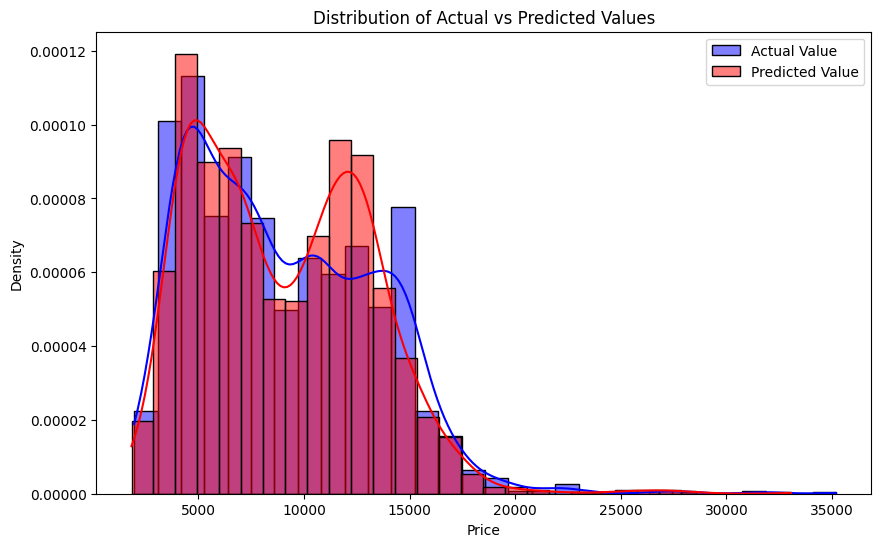

In [60]:
from sklearn.ensemble import RandomForestRegressor
predict(RandomForestRegressor(),1)

2. LinearRegression
3. DecisionTreeRegressor
4. KNeighborsRegressor

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

Training Score: 0.6111467082489375
Predections are: [10335.91236058 11661.74025786 12199.23532796 ...  7713.12847978
 12511.86850714 11718.22105947]


r2 score is 0.6347013065883564
Mean Absolute Error:  1918.6784150171677
Mean Squared Error:  6856331.53532184
Root Mean Absolute Error:  43.80272154806329


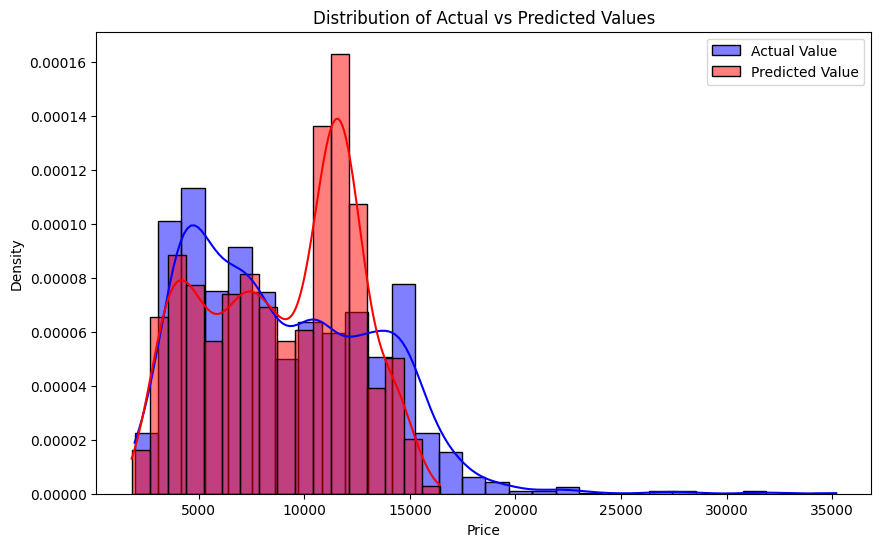

In [63]:
predict(LinearRegression(),0)

Training Score: 0.9664438985796917
Predections are: [ 7927. 12373. 11822. ...  7229. 12646. 11622.]


r2 score is 0.7499718260161639
Mean Absolute Error:  1239.2491966931834
Mean Squared Error:  4692806.420943171
Root Mean Absolute Error:  35.202971418520676


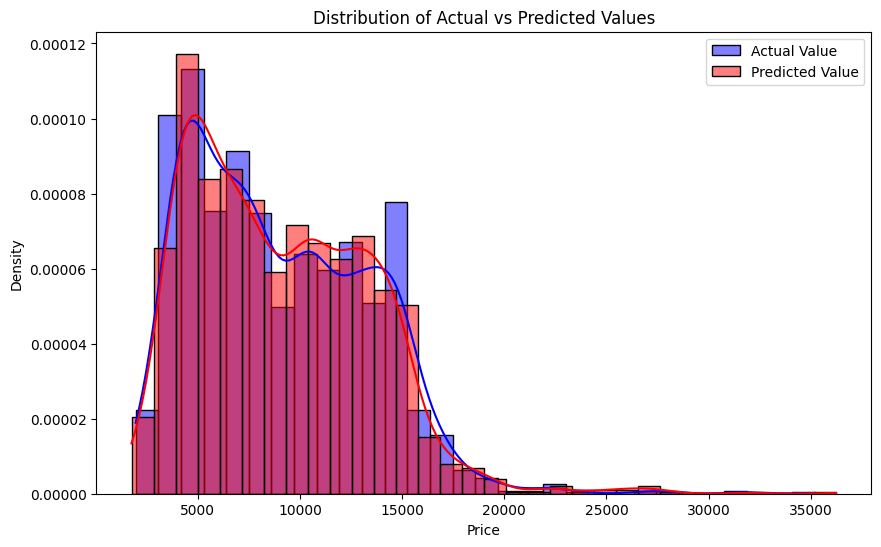

In [64]:
predict(DecisionTreeRegressor(),0)

Training Score: 0.7755241712473033
Predections are: [ 8970.6 13855.4 12054.6 ...  5986.6 14672.4  9342.8]


r2 score is 0.676342588682733
Mean Absolute Error:  1685.660458586804
Mean Squared Error:  6074761.711109031
Root Mean Absolute Error:  41.05679552262699


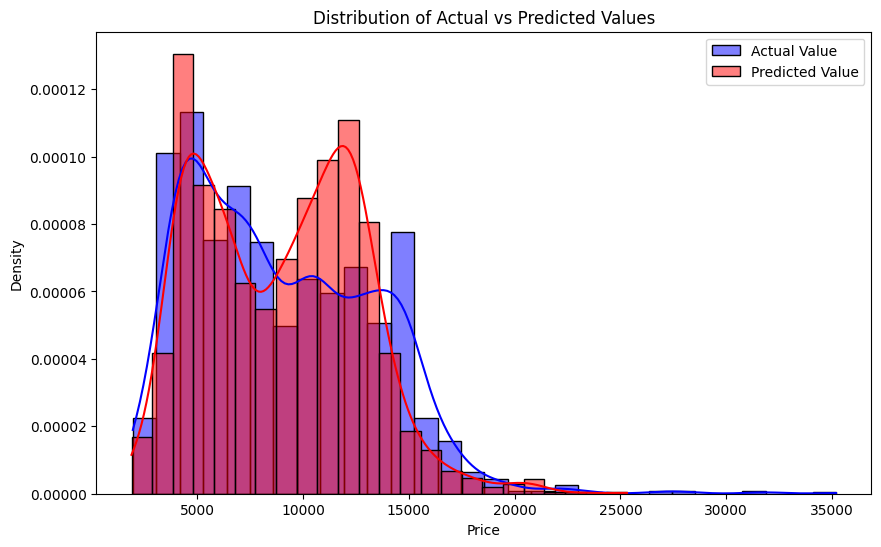

In [65]:
predict(KNeighborsRegressor(),0)

### Hypertuning Model 

In [136]:
from sklearn.model_selection import RandomizedSearchCV

In [138]:
param_grid = {
    'n_estimators':[int(x) for x in np.linspace(start=100, stop=1200, num=12)],
    'max_features':['auto', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(5,30, num=6)],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'bootstrap':[True, False]
}

In [140]:
rf_random = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=param_grid, 
                               n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

In [144]:
rf_random.fit(X_train, y_train)
print(f"Best Parameters: {rf_random.best_params_}")
print(f"Best Score: {rf_random.best_score_}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   4.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   4.0s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   1.3s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   7.8s


/opt/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   7.5s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, max_depth=5, max_

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
225 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
63 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.11/site-pa

Best Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
Best Score: 0.827788477097074


In [146]:
best_params = rf_random.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}


In [166]:
best_rf = rf_random.best_estimator_

y_pred = best_rf.predict(X_test)
r2_score = metrics.r2_score(y_test, y_pred)
print("r2_score after cross validation is {}".format(r2_score))

r2_score after cross validation is 0.8464425648371009


In [168]:
from sklearn import metrics
import pickle
def prediction(ml_model, dump):
    model = ml_model.fit(X_train, y_train)
    print("Training Score: {}".format(model.score(X_train, y_train)))

    predictions = model.predict(X_test)
    print("Predections are: {}".format(predictions))
    print('\n')

    r2_score = metrics.r2_score(y_test, y_pred)
    print("r2 score is {}".format(r2_score))

    print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, predictions))
    print("Mean Squared Error: ", metrics.mean_squared_error(y_test, predictions))
    print("Root Mean Absolute Error: ", np.sqrt(metrics.mean_absolute_error(y_test, predictions)))

    plt.figure(figsize=(10, 6))
    sns.histplot(y_test, color="blue", kde=True, label='Actual Value', stat='density', common_norm=False)
    sns.histplot(predictions, color="red", kde=True, label='Predicted Value', stat='density', common_norm=False)
    plt.title('Distribution of Actual vs Predicted Values')
    plt.xlabel('Price')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    if dump == 1:
        file = open('./model.pkl', 'wb')
        pickle.dump(model, file)
    

Training Score: 0.9526441789172557
Predections are: [ 8110.9        13047.54183333 11394.935      ...  6227.465
 14064.89       11530.55      ]


r2 score is 0.8464425648371009
Mean Absolute Error:  1097.6456661796062
Mean Squared Error:  3024498.216862015
Root Mean Absolute Error:  33.13073597401069


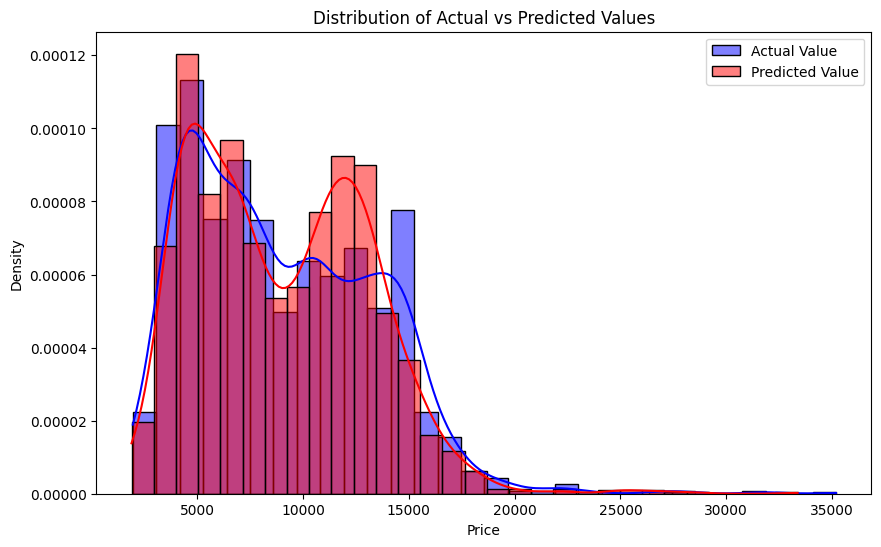

In [170]:
prediction(RandomForestRegressor(),0)